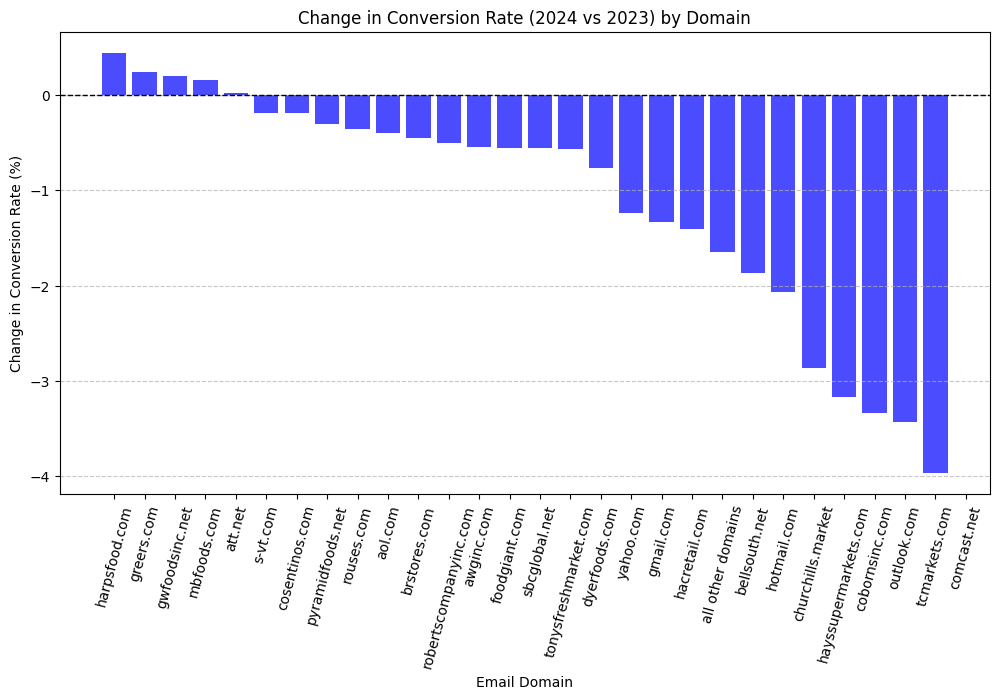

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

file_path = "/content/2023&2024_newdomain_merged(Sheet1).csv"
df = pd.read_csv(file_path)

df['Date'] = pd.to_datetime(df['Date'], errors='coerce')

df['Year'] = df['Date'].dt.year

df['Conversion Rate'] = (df['Unique Clicks'] / df['Sent']) * 100

conversion_rate_comparison = df.groupby(['Domain', 'Year'])['Conversion Rate'].mean().unstack()

conversion_rate_comparison['Change'] = conversion_rate_comparison[2024] - conversion_rate_comparison[2023]

conversion_rate_comparison_sorted = conversion_rate_comparison.sort_values(by='Change', ascending=False)

plt.figure(figsize=(12, 6))
plt.bar(conversion_rate_comparison_sorted.index, conversion_rate_comparison_sorted['Change'], color='b', alpha=0.7)
plt.axhline(0, color='black', linewidth=1, linestyle='--')  # 0 轴基准线
plt.xticks(rotation=75)
plt.ylabel("Change in Conversion Rate (%)")
plt.xlabel("Email Domain")
plt.title("Change in Conversion Rate (2024 vs 2023) by Domain")
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()
